Fetching data for SPY from 2018-01-01 to 2024-12-31...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Columns returned: MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])
Cleaning data...
Columns after cleaning: MultiIndex([(  'Open', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            ( 'Close', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])
Saving data to database: ../quant_pipeline.db in table: price_data ...
Data saved to ../quant_pipeline.db in table 'price_data'.


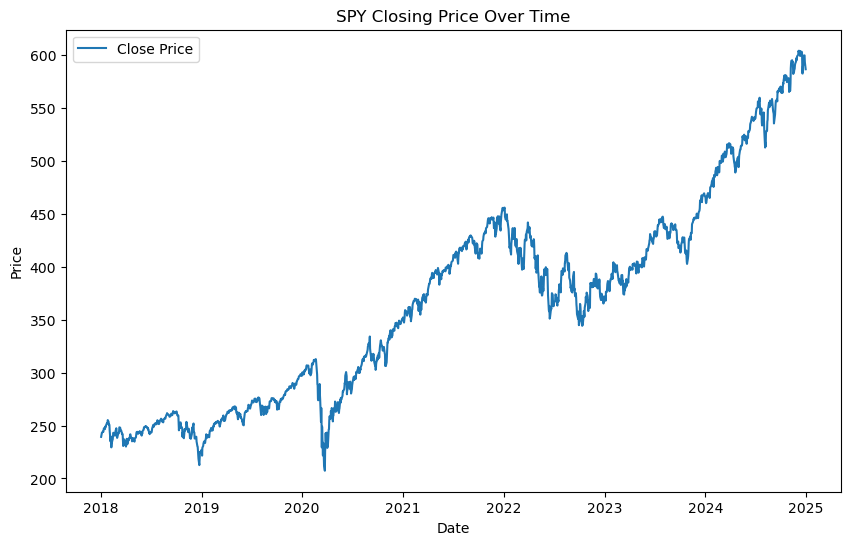

In [1]:
# Import the DataPipeline class from your package
from data_pipeline.data_pipeline import DataPipeline
import matplotlib.pyplot as plt

# Instantiate the pipeline with your desired parameters
pipeline = DataPipeline(
    ticker="SPY",
    start_date="2018-01-01",
    end_date="2024-12-31"
)

# Run the pipeline steps:
# 1. Fetch the data using yfinance
pipeline.fetch_data()

# 2. Clean the data (drop NaNs and select relevant columns)
pipeline.clean_data()

# 3. Save the cleaned data to the SQLite database.
#    This will store the data in 'quant_pipeline.db' under the table 'price_data'.
pipeline.save_data(db_path="../quant_pipeline.db", table_name="price_data")

# Plot the closing price over time
plt.figure(figsize=(10,6))
plt.plot(pipeline.data.index, pipeline.data['Close'], label='Close Price')
plt.title("SPY Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()  # In notebooks, plt.show() renders the plot inline